In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV,train_test_split


In [2]:
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.info


<bound method DataFrame.info of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [4]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
df.columns


Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:

df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [8]:
df.describe()


,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.shape

(200, 5)

In [10]:
df.TV.skew(),df.radio.skew(),df.newspaper.skew(),df.sales.skew()

(-0.06985336213274573,
 0.09417463149664404,
 0.8947204074986175,
 0.4075714250767127)

In [11]:
df.TV.kurtosis(),df.TV.skew()

(-1.2264948242299691, -0.06985336213274573)

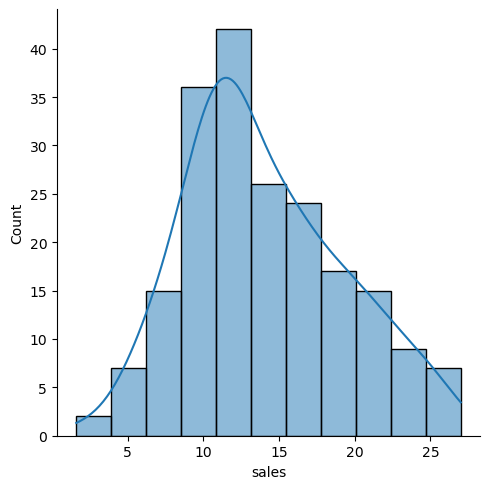

In [12]:
import seaborn as sns
sns.displot(df['sales'],kde=True)

In [13]:
import seaborn as sns
sns.displot(df['newspaper'],kde=True)

In [14]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(1,3,sharey=True)
df.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
df.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
df.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])


<AxesSubplot:xlabel='newspaper', ylabel='sales'>

In [15]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [16]:
X=df[['TV']]
Y=df['sales']

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt

In [18]:
lr_model=LinearRegression()
lr_model.fit(X,Y)

LinearRegression()

In [19]:
lr_model.intercept_,lr_model.coef_

(7.032593549127693, array([0.04753664]))

In [20]:
y_pred=lr_model.predict(X)

In [21]:
y_pred[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [22]:
Y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [23]:
print("mean_Absolute_error - MAE (difference btw actual and predicted output)",mean_absolute_error(Y,y_pred))

mean_Absolute_error - MAE (difference btw actual and predicted output) 2.549806038927486


In [24]:
print("mean_squredAbsolute_error - MSAE (difference btw actual and predicted output)",sqrt(mean_absolute_error(Y,y_pred)))

mean_squredAbsolute_error - MSAE (difference btw actual and predicted output) 1.5968112095446618


In [25]:
print("mean_percentageAbsolute_error - MpAE (difference btw actual and predicted output)",mean_absolute_percentage_error(Y,y_pred)*100)

mean_percentageAbsolute_error - MpAE (difference btw actual and predicted output) 20.57659543920778


In [26]:
x_new=pd.DataFrame({'TV':[50]})
x_new

,TV
0,50


In [27]:
y_new=lr_model.predict(x_new)
y_new

array([9.40942557])

In [28]:
x_new=pd.DataFrame({'TV':[df.TV.min(),df.TV.max()]})
x_new.head()

,TV
0,0.7
1,296.4


In [29]:
df.plot(kind='scatter',x='TV',y='sales')
plt.plot(np.array(X),np.array(y_pred),c='red',linewidth=3)

In [30]:
xe=df[['TV','radio','newspaper']]
ye=df['sales']

In [31]:
X_train, X_test , y_train, y_test=train_test_split(xe,ye,test_size=0.2)
X_train

,TV,radio,newspaper
92,217.7,33.5,59.0
10,66.1,5.8,24.2
86,76.3,27.5,16.0
61,261.3,42.7,54.7
158,11.7,36.9,45.2
...,...,...,...
12,23.8,35.1,65.9
64,131.1,42.8,28.9
66,31.5,24.6,2.2
110,225.8,8.2,56.5


In [32]:
X_test

,TV,radio,newspaper
152,197.6,23.3,14.2
30,292.9,28.3,43.2
161,85.7,35.8,49.3
77,120.5,28.5,14.2
145,140.3,1.9,9.0
132,8.4,27.2,2.1
139,184.9,43.9,1.7
195,38.2,3.7,13.8
143,104.6,5.7,34.4
111,241.7,38.0,23.2


In [33]:
y_test

152    16.6
30     21.4
161    13.3
77     14.2
145    10.3
132     5.7
139    20.7
195     7.6
143    10.4
111    21.8
98     25.4
23     15.5
103    14.7
81     12.3
173    11.7
180    10.5
133    19.6
51     10.7
16     12.5
31     11.9
75      8.7
151    11.6
34      9.5
90     11.2
153    19.0
87     16.0
56      5.5
94     11.5
45     14.9
160    14.4
116    12.2
48     14.8
83     13.6
99     17.2
15     22.4
115    12.6
131    12.7
140    10.9
3      18.5
36     25.4
Name: sales, dtype: float64

In [34]:
len(y_test)

40

In [35]:
len(y_train)

160

In [36]:
len(X_train)

160

In [37]:
len(X_test)

40

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt
lr_modell=LinearRegression()


In [39]:
lr_modell.fit(X_train, y_train)

LinearRegression()

In [40]:
lr_modell.intercept_, lr_modell.coef_

(2.8438648076241595, array([0.04527083, 0.18657413, 0.00513088]))

In [41]:
y_test_pred=lr_modell.predict(X_test)
y_test_pred

array([16.20941602, 21.60539195, 13.65588076, 13.68922068,  9.59603066,
        8.30973093, 19.41376764,  5.33434079,  8.81916805, 20.99467711,
       24.11361012, 16.46672651, 14.65117104, 14.65409253, 11.85782372,
       10.46095543, 19.27602858,  9.19863871, 13.32675991, 11.39938292,
       12.22093156, 10.1387313 ,  7.47545528,  9.88566735, 18.19918456,
       15.75452645,  8.62949315, 10.37391607, 15.13032724, 14.18759222,
       11.9449245 , 16.33329881, 14.42559738, 16.98012912, 20.86079386,
       13.04419566, 15.61138094,  9.40469207, 17.708063  , 23.12424999])

In [42]:
print("mean_Absolute_error - MAE (difference btw actual and predicted output)",mean_absolute_error(y_test,y_test_pred))

mean_Absolute_error - MAE (difference btw actual and predicted output) 1.1269324389029944


In [43]:
y_train_pred=lr_modell.predict(X_train)
y_train_pred

array([19.25227901,  7.04256366, 11.51091154, 22.92050633, 10.49003447,
       13.05887241, 15.67683867, 16.94667556,  8.7126762 , 10.64526051,
        8.99728464, 12.33001832, 14.66326294,  5.74880309, 16.4037568 ,
        8.71512399, 15.24537684, 18.4579499 , 20.05406226, 16.33394618,
        9.95666049,  9.65042485, 20.70529771, 19.21480362, 14.5293242 ,
       12.0017894 , 20.66824097, 11.32690621, 15.00040005, 10.71433323,
       16.70914579, 12.62477832,  8.10896643, 19.64057514, 23.22316026,
       18.24962348, 20.03122515, 17.293889  , 13.96988325, 12.47266198,
       14.4778659 , 17.7248845 , 10.91995225,  9.92597886,  8.00221112,
       16.99657211, 20.93279598, 17.28694214,  9.1259454 ,  6.66245983,
       15.8253586 , 20.98874437, 11.68714444, 12.42218244, 12.64488428,
        8.00203644, 18.60544253,  4.54961265, 17.1615975 , 21.97557932,
       12.67714737, 18.6008185 , 15.4698794 , 15.1200203 , 19.45309811,
        5.2229811 , 20.19142711, 18.77838751,  3.63013047, 17.14

In [44]:
print("mean_Absolute_error - MAE (difference btw actual and predicted output)",mean_absolute_error(y_train,y_train_pred))

mean_Absolute_error - MAE (difference btw actual and predicted output) 1.3034070748821986


In [45]:
print("mean_Absolute_error - MAE (difference btw actual and predicted output)",sqrt(mean_absolute_error(y_train,y_train_pred)))

mean_Absolute_error - MAE (difference btw actual and predicted output) 1.1416685486086575


In [46]:
from statsmodels.formula.api import ols


In [47]:
ol=ols(formula ='sales ~ TV', data=df).fit()
train_pred =ol.predict(X_train)
test_pred=ol.predict(X_test)
train_pred
test_pred

152    16.425834
30     20.956076
161    11.106484
77     12.760759
145    13.701984
132     7.431901
139    15.822118
195     8.848493
143    12.004926
111    18.522200
98     20.803958
23     17.885209
103    15.964728
81     18.431880
173    15.037764
180    14.476831
133    17.481147
51     11.805272
16     10.255578
31     12.399480
75      7.835963
151    12.784527
34     11.581850
90     13.416764
153    15.175620
87     12.294900
56      7.379611
94     12.138029
45     15.356259
160    15.232664
116    13.649694
48     17.832918
83     10.284100
99     13.459547
15     16.321253
115    10.602595
131    19.639311
140    10.521783
3      14.234395
36     19.720123
dtype: float64

In [48]:
print("MSE on train:", mean_squared_error(y_train, train_pred))
print("MSE on test:", mean_squared_error(y_test, test_pred))

print("RMSE on train:", sqrt(mean_squared_error(y_train, train_pred)))
print("RMSE on test:", sqrt(mean_squared_error(y_test, test_pred)))

print("MAE on train:", mean_absolute_error(y_train, train_pred))
print("MAE on test:", mean_absolute_error(y_test, test_pred))

print("MAPE on train:", mean_absolute_percentage_error(y_train, train_pred))
print("MAPE on test:", mean_absolute_percentage_error(y_test, test_pred))

MSE on train: 10.735219846772518
MSE on test: 9.622385191193711
RMSE on train: 3.27646453464287
RMSE on test: 3.1019969682760347
MAE on train: 2.5459096381891726
MAE on test: 2.56539164188074
MAPE on train: 0.2107084147727762
MAPE on test: 0.1859961128692846


In [49]:
print("r2_score",ol.rsquared)
print("adjectedr2_Score",ol.rsquared_adj)

r2_score 0.611875050850071
adjectedr2_Score 0.6099148238341623


In [50]:
a=df[['TV','radio','newspaper']]
b=df['sales']

In [53]:
from statsmodels.formula.api import ols
om=ols(formula='sales ~ TV + radio + newspaper', data=df).fit()
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=100)

y_pred_te=om.predict(a_test)
y_pred_tr=om.predict(a_train)
y_pred

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

In [60]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt
print("mean absolute error",mean_absolute_error(b_test,y_pred_te))
print("mean absolute error",mean_absolute_error(b_train,y_pred_tr))

print("mean square absolute error",sqrt(mean_absolute_error(b_test,y_pred_te)))
print("mean square absolute error",sqrt(mean_absolute_error(b_train,y_pred_tr)))


print("mean squared error",mean_squared_error(b_test,y_pred_te))
print("mean squared error",mean_squared_error(b_train,y_pred_tr))

print("rsquared", om.rsquared)

print("adjustent", om.rsquared_adj)

mean absolute error 0.9443825445110899
mean absolute error 1.3289184009810626
mean square absolute error 0.9717934680327348
mean square absolute error 1.152787231444321
mean squared error 1.577048237543142
mean squared error 3.085895833752885
rsquared 0.8972106381789522
adjustent 0.8956373316204668
